# $\Phi$-SO demo (quick SR)

In [1]:
# External packages
import numpy as np
import matplotlib.pyplot as plt
# Internal code import
import physo

### Dataset

In [2]:
# Dataset
z = np.random.uniform(-10, 10, 50)
v = np.random.uniform(-10, 10, 50)
X = np.stack((z, v), axis=0)
y = 1.234*9.807*z + 1.234*v**2

Where $X=(z,v)$, $z$ being a length of dimension $L^{1}, T^{0}, M^{0}$, v a velocity of dimension $L^{1}, T^{-1}, M^{0}$, $y=E$ if an energy of dimension $L^{2}, T^{-2}, M^{1}$.

It be noted that free constants search starts around 1. by default. Therefore when using default hyperparameters, normalizing the data around an order of magnitude of 1 is strongly recommended.

Dataset plot

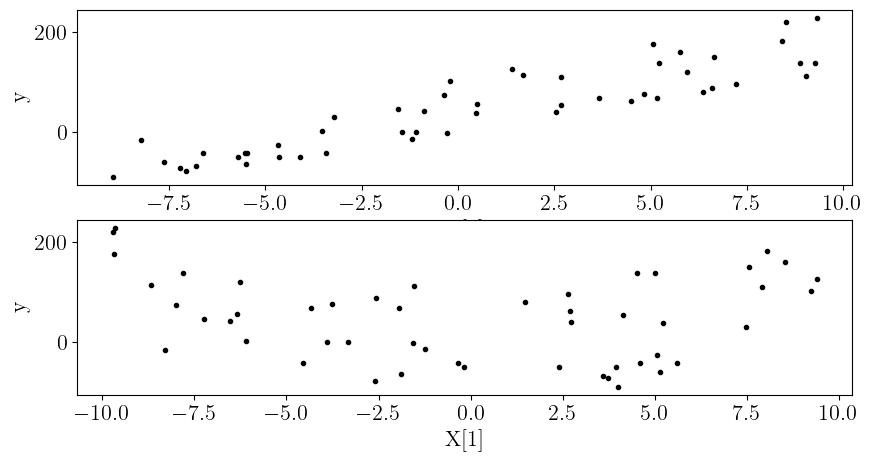

In [3]:
n_dim = X.shape[0]
fig, ax = plt.subplots(n_dim, 1, figsize=(10,5))
for i in range (n_dim):
    curr_ax = ax if n_dim==1 else ax[i]
    curr_ax.plot(X[i], y, 'k.',)
    curr_ax.set_xlabel("X[%i]"%(i))
    curr_ax.set_ylabel("y")
plt.show()

### Running SR task

#### Available configurations

It should be noted that SR capabilities of `physo` are heavily dependent on hyperparameters, it is therefore recommended to tune hyperparameters to your own specific problem for doing science.
Summary of available currently configurations:

|  Config |                           Notes                           |
|:-------:|:---------------------------------------------------------:|
| config0 | Light config for demo purposes.                           |
| config1 | Tuned on a few physical cases.                            |
| config2 | [work in progress] Good starting point for doing science. |

By default, `config0` is used, however it is recommended to use the latest configuration currently available (`config1`) as a starting point for doing science.


#### Running physo

Given the units input variables $(x_0,..., x_n)$ (here $(z, v)$ ), the root variable $y$ (here $E$) as well as free and fixed constants, you can run an SR task to recover $f$ via:

(Allowing the use of a fixed constant $1$ of dimension $L^{0}, T^{0}, M^{0}$ (ie dimensionless) and free constants $m$ of dimension $L^{0}, T^{0}, M^{1}$ and $g$ of dimension $L^{1}, T^{-2}, M^{0}$.)

It should be noted that here the units vector are of size 3 (eg: `[1, 0, 0]`) as in this example the variables have units dependent on length, time and mass only.
However, units vectors can be of any size $\leq 7$ as long as it is consistent across X, y and constants, allowing the user to express any units (dependent on length, time, mass, temperature, electric current, amount of light, or amount of matter). 
In addition, dimensional analysis can be performed regardless of the order in which units are given, allowing the user to use any convention ([length, mass, time] or [mass, time, length] etc.) as long as it is consistent across X,y and constants.

In [ ]:
# Running SR task
expression, logs = physo.SR(X, y,
                            # Giving names of variables (for display purposes)
                            X_names = [ "z"       , "v"        ],
                            # Giving units of input variables
                            X_units = [ [1, 0, 0] , [1, -1, 0] ],
                            # Giving name of root variable (for display purposes)
                            y_name  = "E",
                            # Giving units of the root variable
                            y_units = [2, -2, 1],
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            # Units of fixed constants
                            fixed_consts_units = [ [0,0,0] ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "m"       , "g"        ],
                            # Units offFree constants
                            free_consts_units = [ [0, 0, 1] , [1, -2, 0] ],
                            # Run config
                            run_config = physo.config.config0.config0,

)

SR task started...
=========== Epoch 00000 ===========
-> Time 4.43 s

Overall best  at R=0.615748
-> Raw expression : 
       ⎛   cos(0⋅1.0)      ⎞
g⋅-m⋅z⋅⎝- ℯ           - 1.0⎠

Best of epoch at R=0.615748
-> Raw expression : 
       ⎛   cos(0⋅1.0)      ⎞
g⋅-m⋅z⋅⎝- ℯ           - 1.0⎠


=========== Epoch 00001 ===========
-> Time 5.17 s

Overall best  at R=0.615748
-> Raw expression : 
       ⎛   cos(0⋅1.0)      ⎞
g⋅-m⋅z⋅⎝- ℯ           - 1.0⎠

Best of epoch at R=0.565174
-> Raw expression : 
                               2
  ⎛     ⎛ m⋅z            ⎞    ⎞ 
  ⎜     ⎜ ─── - 1.0 + 1.0⎟    ⎟ 
  ⎜     ⎜ m⋅z            ⎟    ⎟ 
m⋅⎝v⋅cos⎝ℯ               ⎠ + v⎠ 


=========== Epoch 00002 ===========
-> Time 4.09 s

Overall best  at R=0.615748
-> Raw expression : 
       ⎛   cos(0⋅1.0)      ⎞
g⋅-m⋅z⋅⎝- ℯ           - 1.0⎠

Best of epoch at R=0.615748
-> Raw expression : 
                 1.0                 
─────────────────────────────────────
⎛                 1                 ⎞
⎜────────────

### Inspecting the best expression found

In [ ]:
# Inspecting the best expression found
# In ascii
print("\nIn ascii:")
print(expression.get_infix_pretty(do_simplify=True))
# In latex
print("\nIn latex")
print(expression.get_infix_latex(do_simplify=True))
# Free constants values
print("\nFree constants values")
print(expression.free_const_values.cpu().detach().numpy())

### Inspecting pareto front expressions

In [ ]:

# Inspecting pareto front expressions
pareto_front_complexities, pareto_front_expressions, pareto_front_r, pareto_front_rmse = logs.get_pareto_front()
for i, prog in enumerate(pareto_front_expressions):
    # Showing expression
    print(prog.get_infix_pretty(do_simplify=True))
    # Showing free constant
    free_consts = prog.free_const_values.detach().cpu().numpy()
    for j in range (len(free_consts)):
        print("%s = %f"%(prog.library.free_const_names[j], free_consts[j]))
    # Showing RMSE
    print("RMSE = {:e}".format(pareto_front_rmse[i]))
    print("-------------\n")